# Machine Learning Lab 04: Multinomial Logistic Regression



## Generalized Linear Models

From lecture, we know that members of the exponential family distributions can be written in the form
$$p(y;\eta) = b(y)e^{(\eta^\top T(y)-a(\eta))},$$
where
- $\eta$ is the natural parameter or canonical paramter of the distribution,
- $T(y)$ is the sufficient statistic (we normally use $T(y) = y$),
- $b(y)$ is an arbitrary scalar function of y, and
- $a(\eta)$ is the log partition function. We use $e^{a(\eta)}$ just to normalize the distribution to have a sum or integral of 1.

Each choice of $T$, $a$, and $b$ defines a family (set) of distributions parameterized by $\eta$.

If we can write $p(y \mid \mathbf{x} ; \theta)$ as a member of the exponential family of distributions with parameters $\mathbf{\eta}$ with
$\eta_i = \theta^\top_i \mathbf{x}$, we obtain a *generalized linear model* that can be optimized using the maximum likelihood principle.

The GLM for the Gaussian distribution with natural parameter $\eta$ being the mean of the Gaussian gives us ordinary linear regression.

The Bernoulli distribution with parameter $\phi$ can be written as an exponential distribution
with natural parmeter $\eta = \log \frac{\phi}{1-\phi}$. The GLM for this distribution is logistic regression.

When we write the multinomial distribution with paremeters $\phi_i > 0$ for classes $i \in 1..k$ with the constraint that
$$\sum_{i=1}^{k} \phi_i = 1$$ as a member of the exponential family,
the resulting GLM is called *multinomial logistic regression*. The parameters $\phi_1, \ldots, \phi_k$ are written
in terms of $\theta$ as
$$\phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{k}e^{\theta^\top_j \mathbf{x}}}. $$


## Multinomial Regression Example

The following example of multinomial logistic regression is from [Kaggle](https://www.kaggle.com/saksham219/softmax-regression-for-iris-classification).

The data set is the famous [Iris dataset from the UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/iris).

The data contain 50 samples from each of three classes. Each class refers to a particular species of the iris plant. 
The data include four independent variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

The target takes on one of three classes:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica
   
To predict the target value, we use multinomial logistic regression for $k=3$ classes i.e. $y \in \{ 1, 2, 3 \}$. 

Given $\mathbf{x}$, we would like to predict a probability distribution over the
three outcomes for $y$, i.e., $\phi_1 = p(y=1 \mid \mathbf{x})$, $\phi_2 = p(y=2 \mid \mathbf{x})$, and $\phi_3 = p(y=3 \mid \mathbf{x})$.


In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import random
import math

The `phi` function returns $\phi_i$ for input patterns $\mathtt{X}$ and parameters $\theta$.

In [2]:
def phi(i, theta, X):
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta,mat_x.T))
    den = 0
    for j in range(0,k):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j,mat_x.T))
    phi_i = num/den
    return phi_i

The `grad_cost` function gives the gradient of the cost for data $\mathtt{X}, \mathbf{y}$ for class $j\in 1..k$.

In [3]:
def indicator(i, j):
    if i == j: return 1
    else: return 0

def grad_cost(X, y, j, theta):
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta,X.loc[i])
        sum = sum + (X.loc[i] * p)
    grad = -sum/m
    return grad

def gradient_descent(X, y, theta, alpha, iters):
    costt = np.zeros(iters)
    for iter in range(iters):
        costt[iter] = cost(X,y,theta)
        for j in range(0, k):
            theta[j] = theta[j] - alpha * grad_cost(X, y, j, theta)
    return theta,costt

def h(X, theta):
    X = np.matrix(X)
    h_matrix = np.empty((k,1))
    den = 0
    for j in range(0,k):
        #print(np.exp(theta@X.T).shape)
        den = den + math.exp(theta[j]@X.T)
    for i in range(0,k):
        #print(np.exp(theta[i]@X.T).shape)
        h_matrix[i] = math.exp(np.dot(theta[i],X.T))
    h_matrix = h_matrix/den
    return h_matrix

def cost(X,y,theta):
    p = 0
    for i in range(X.shape[0]):
        #print("h(X,theta)",h(X,theta))
        for k in range(theta.shape[0]):
            p -= indicator(y[i], k)*np.log(phi(k, theta,X.loc[i]))
        #j += (1-y)*np.log(1-h(X,theta))+y*log(h(X,theta))
    print(p,end=" ")
    return p
    

In [4]:
data = pd.read_csv('Iris.csv')
print(data.head())

data = data.drop(['Id'],axis=1)
print(data.head())


# extract y from data
y_label = 'Species';

y = data[y_label];

y_index = data.columns.get_loc(y_label)
# extract features from data
X = data.iloc[:,:y_index]

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
m, n = X.shape
idx = np.arange(0,m)

# Partion data into training and testing dataset
random.shuffle(idx)
data = data.iloc[idx,:]
data = data.reset_index()
data = data.drop(['index'],axis=1)
percent_train = 0.7
m_train = int(m*percent_train)

X_train_un = data.iloc[0:m_train,:y_index];
mean = np.mean(X_train_un,axis=0)
std = np.std(X_train_un,axis=0)
X_train = (X_train_un-mean)/std
X_test_un = data.iloc[m_train:,:y_index];
X_test = (X_test_un-mean)/std

y_train = data.iloc[:m_train,y_index];
y_test = data.iloc[m_train:,y_index];
labels = pd.unique(data[y_label])

# Encode target labels as integers 0..k-1

i = 0
for label in y.unique():
    y_train[y_train.str.match(label)] = str(i)
    y_test[y_test.str.match(label)] = str(i)
    i = i + 1      
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [6]:

# k is the number of unique labels

k = len(y.unique())

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data

m, n = X_train.shape

# Initialize theta for each class  

theta_initial = np.ones((k,n))

alpha = 15
iterations = 50

# Logistic regression

theta,costt = gradient_descent(X_train,y_train,theta_initial, alpha, iterations)

print()
print(theta)

115.35429031015136 36.12243750723862 34.51399859801229 33.86975962372667 17.140121530473383 12.948589984126697 11.302924005639905 10.18446145383887 9.542480503979858 9.170759035580486 8.91058946360177 8.701686701630248 8.522881197327477 8.365250860785462 8.224029650968319 8.096165438029296 7.979483439127715 7.872340282351667 7.773448534945624 7.681773443685196 7.596466745074331 7.516821973079604 7.442243110077738 7.3722218966543975 7.306320964329917 7.244161008044565 7.185410839900034 7.1297795486319195 7.077010231206975 7.026874920123497 6.97917043486879 6.933714957711921 6.890345184185529 6.84891393444076 6.809288137722825 6.771347121489976 6.734981151165116 6.700090177510882 6.666582757084084 6.634375117808274 6.603390346870659 6.573557682241512 6.544811892379565 6.517092731311493 6.490344458397078 6.464515413820014 6.43955764225976 6.415426558363828 6.392080648603476 6.369481204895614 
[[-2.81927277 -4.60287953  6.18716354 -7.41911633 -7.00957914]
 [ 2.25262538 -1.42257513  2.62161

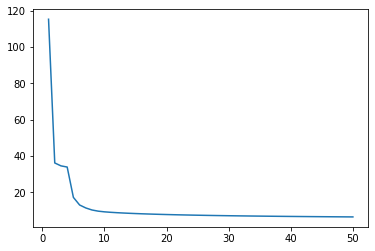

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
iterationss = np.arange(1,iterations+1)
plt.plot(iterationss,costt)

By normalizing the data, we can get the optimum theta in 50 iterations, in contrast, if theta is not normalized, 2000 iterations would still not suffice for this optimization. 

In [8]:
# Predicting classes on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data

m,n = X_test.shape

y_pred = []
for index,row in X_test.iterrows():
    h_matrix = h(row, theta)
    prediction = int(np.where(h_matrix == h_matrix.max())[0])
    y_pred.append(prediction)
        
# Estimate accuracy of model on test data        

correct = (y_pred == y_test).value_counts()[True]
accuracy = correct/m
print('Accuracy: %.4f' % accuracy)


Accuracy: 0.9778


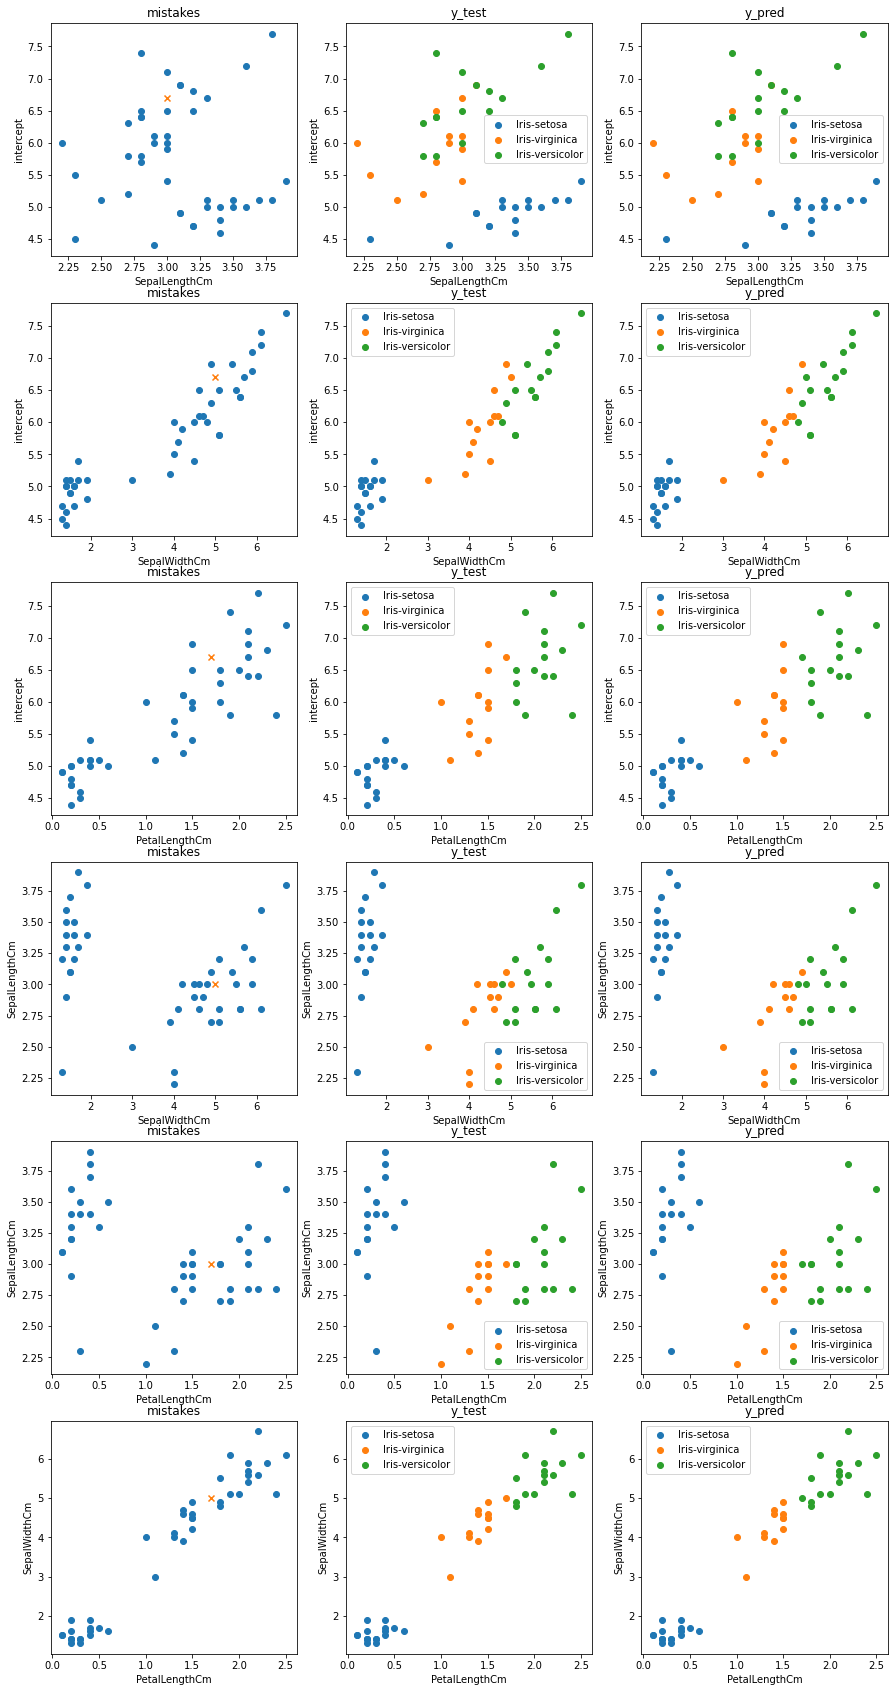

In [10]:
#find all combinations of features
#plot each of the combinations in a subplots
#make sure the coloring is correct

fig = plt.figure(figsize=(15,30))
gs = fig.add_gridspec(6, 3)

combinations = []

for i in range(0,n-1):
    for j in range(i+1,n-1):
        combinations.append((i,j))
        #axs[]
#print(combinations)

y_pred = np.array(y_pred)

for i,tup in enumerate(combinations):
    vertical_correct = X_test_un.iloc[(y_pred==y_test).values,tup[0]].values
    horizontal_correct = X_test_un.iloc[(y_pred==y_test).values,tup[1]].values
    vertical_incorrect = X_test_un.iloc[(y_pred!=y_test).values,tup[0]].values
    horizontal_incorrect = X_test_un.iloc[(y_pred!=y_test).values,tup[1]].values
    
    one_vertical =  X_test_un.iloc[y_test.values == 0,tup[0]].values
    one_horizontal =  X_test_un.iloc[y_test.values == 0,tup[1]].values
    two_vertical =  X_test_un.iloc[y_test.values == 1,tup[0]].values
    two_horizontal =  X_test_un.iloc[y_test.values == 1,tup[1]].values
    three_vertical =  X_test_un.iloc[y_test.values == 2,tup[0]].values
    three_horizontal =  X_test_un.iloc[y_test.values == 2,tup[1]].values
    
    ne_vertical =  X_test_un.iloc[y_pred == 0,tup[0]].values
    ne_horizontal =  X_test_un.iloc[y_pred == 0,tup[1]].values
    wo_vertical =  X_test_un.iloc[y_pred == 1,tup[0]].values
    wo_horizontal =  X_test_un.iloc[y_pred == 1,tup[1]].values
    hree_vertical =  X_test_un.iloc[y_pred == 2,tup[0]].values
    hree_horizontal =  X_test_un.iloc[y_pred == 2,tup[1]].values
    
    fig.add_subplot(gs[i,0])
    plt.scatter(horizontal_correct,vertical_correct,marker='o')
    plt.scatter(horizontal_incorrect,vertical_incorrect,marker='x')
    plt.xlabel(X_test.iloc[:,tup[1]].name)
    plt.ylabel(X_test.iloc[:,tup[0]].name)
    plt.title("mistakes")
    
    fig.add_subplot(gs[i,1])
    plt.scatter(one_horizontal,one_vertical,marker='o',label=labels[0])
    plt.scatter(two_horizontal,two_vertical,marker='o',label=labels[1])
    plt.scatter(three_horizontal,three_vertical,marker='o',label=labels[2])
    plt.xlabel(f"{X_test.iloc[:,tup[1]].name}")
    plt.ylabel(f"{X_test.iloc[:,tup[0]].name}")
    plt.title("y_test")
    plt.legend()
    
    fig.add_subplot(gs[i,2])
    plt.scatter(ne_horizontal,ne_vertical,marker='o',label=labels[0])
    plt.scatter(wo_horizontal,wo_vertical,marker='o',label=labels[1])
    plt.scatter(hree_horizontal,hree_vertical,marker='o',label=labels[2])
    plt.xlabel(f"{X_test.iloc[:,tup[1]].name}")
    plt.ylabel(f"{X_test.iloc[:,tup[0]].name}")
    plt.title("y_pred")
    plt.legend()

The graph on the left shows the misclassified data, the graph in the middle shows the actual classification of the test set, and the graph on the right shows the predicted classification.  From the graph, we can see that there is a misclassified data point. By looking at the two other graphs, we could see that the misclassified data point was mostly right  at the boundary between the different classes. This makes it difficult for the predictor to predict which class it is in, therefore it misclassified the data.